In [ ]:
import nflreadpy as nfl
import pandas as pd
import polars as pl
import pyarrow as pa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import f_oneway
from polars import col


"""
valid columns: ["player_id", "player_name", "player_display_name", "position", 
"position_group", "headshot_url", "season", "week", "season_type", "team", 
"opponent_team", "completions", "attempts", "passing_yards", "passing_tds", 
"passing_interceptions", "sacks_suffered", "sack_yards_lost", "sack_fumbles", 
"sack_fumbles_lost", "passing_air_yards", "passing_yards_after_catch", "passing_first_downs", 
"passing_epa", "passing_cpoe", "passing_2pt_conversions", "pacr", "carries", "rushing_yards", 
"rushing_tds", "rushing_fumbles", "rushing_fumbles_lost", "rushing_first_downs", "rushing_epa", 
"rushing_2pt_conversions", "receptions", "targets", "receiving_yards", "receiving_tds", "receiving_fumbles", 
"receiving_fumbles_lost", "receiving_air_yards", "receiving_yards_after_catch", "receiving_first_downs", 
"receiving_epa", "receiving_2pt_conversions", "racr", "target_share", "air_yards_share", "wopr", "special_teams_tds",
 "def_tackles_solo", "def_tackles_with_assist", "def_tackle_assists", "def_tackles_for_loss", "def_tackles_for_loss_yards", 
 "def_fumbles_forced", "def_sacks", "def_sack_yards", "def_qb_hits", "def_interceptions", "def_interception_yards", 
 "def_pass_defended", "def_tds", "def_fumbles", "def_safeties", "misc_yards", "fumble_recovery_own", 
 "fumble_recovery_yards_own", "fumble_recovery_opp", "fumble_recovery_yards_opp", "fumble_recovery_tds", 
 "penalties", "penalty_yards", "punt_returns", "punt_return_yards", "kickoff_returns", "kickoff_return_yards", 
 "fg_made", "fg_att", "fg_missed", "fg_blocked", "fg_long", "fg_pct", "fg_made_0_19", "fg_made_20_29", "fg_made_30_39",
   "fg_made_40_49", "fg_made_50_59", "fg_made_60_", "fg_missed_0_19", "fg_missed_20_29", "fg_missed_30_39", "fg_missed_40_49", 
   "fg_missed_50_59", "fg_missed_60_", "fg_made_list", "fg_missed_list", "fg_blocked_list", "fg_made_distance", 
   "fg_missed_distance", "fg_blocked_distance", "pat_made", "pat_att", "pat_missed", "pat_blocked", "pat_pct", "gwfg_made", 
   "gwfg_att", "gwfg_missed", "gwfg_blocked", "gwfg_distance", "fantasy_points", "fantasy_points_ppr"]
"""



'\nvalid columns: ["player_id", "player_name", "player_display_name", "position", \n"position_group", "headshot_url", "season", "week", "season_type", "team", \n"opponent_team", "completions", "attempts", "passing_yards", "passing_tds", \n"passing_interceptions", "sacks_suffered", "sack_yards_lost", "sack_fumbles", \n"sack_fumbles_lost", "passing_air_yards", "passing_yards_after_catch", "passing_first_downs", \n"passing_epa", "passing_cpoe", "passing_2pt_conversions", "pacr", "carries", "rushing_yards", \n"rushing_tds", "rushing_fumbles", "rushing_fumbles_lost", "rushing_first_downs", "rushing_epa", \n"rushing_2pt_conversions", "receptions", "targets", "receiving_yards", "receiving_tds", "receiving_fumbles", \n"receiving_fumbles_lost", "receiving_air_yards", "receiving_yards_after_catch", "receiving_first_downs", \n"receiving_epa", "receiving_2pt_conversions", "racr", "target_share", "air_yards_share", "wopr", "special_teams_tds",\n "def_tackles_solo", "def_tackles_with_assist", "def_t

In [ ]:


def get_qbs(team: str, years: list[int]):
    frames = []
    for yr in years:
        df = nfl.load_player_stats(yr)
        df = df.filter(
            (pl.col("team") == team) &
            (pl.col("position") == "QB")
        )
        frames.append(df)
    return pl.concat(frames)


seanp_years = {
    "NYG": list(range(1999, 2003)),
    "DAL": list(range(2003, 2006)),
    "NO": list(range(2006, 2012)) + list(range(2013, 2022)),
    "DEN": [2023, 2024],
      
}


qb_list = [get_qbs(team, years) for team, years in seanp_years.items()]

qb_list




[shape: (75, 114)
 ┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
 │ player_id ┆ player_na ┆ player_di ┆ position ┆ … ┆ gwfg_bloc ┆ gwfg_dist ┆ fantasy_p ┆ fantasy_p │
 │ ---       ┆ me        ┆ splay_nam ┆ ---      ┆   ┆ ked       ┆ ance      ┆ oints     ┆ oints_ppr │
 │ str       ┆ ---       ┆ e         ┆ str      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
 │           ┆ str       ┆ ---       ┆          ┆   ┆ i32       ┆ i32       ┆ f64       ┆ f64       │
 │           ┆           ┆ str       ┆          ┆   ┆           ┆           ┆           ┆           │
 ╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
 │ 00-000621 ┆ K.Graham  ┆ Kent      ┆ QB       ┆ … ┆ 0         ┆ 0         ┆ 3.84      ┆ 3.84      │
 │ 2         ┆           ┆ Graham    ┆          ┆   ┆           ┆           ┆           ┆           │
 │ 00-000329 ┆ K.Collins ┆ Kerry     ┆ QB       ┆ … ┆ 0         

In [37]:
peyton_qbs = pl.concat([get_qbs(team, years) for team, years in seanp_years.items()])


In [38]:
summary_stats = peyton_qbs.select([
    "player_display_name",
    "team",
    "season",
    "week",
    "season_type",
    "completions",
    "attempts",
    "passing_yards",
    "passing_tds",
    "passing_interceptions",
    "passing_air_yards",
    "passing_yards_after_catch",
    "passing_cpoe",
    "passing_epa",
])
summary_stats



player_display_name,team,season,week,season_type,completions,attempts,passing_yards,passing_tds,passing_interceptions,passing_air_yards,passing_yards_after_catch,passing_cpoe,passing_epa
str,str,i32,i32,str,i32,i32,i32,i32,i32,i32,i32,f64,f64
"""Kent Graham""","""NYG""",1999,1,"""REG""",12,24,91,0,0,0,91,null,-7.561057
"""Kerry Collins""","""NYG""",1999,2,"""REG""",3,7,44,0,1,13,44,null,-0.753054
"""Kent Graham""","""NYG""",1999,2,"""REG""",20,31,268,1,1,-5,268,null,-1.840212
"""Kent Graham""","""NYG""",1999,3,"""REG""",23,36,216,2,0,0,216,null,12.10371
"""Kerry Collins""","""NYG""",1999,4,"""REG""",6,12,86,0,0,0,86,null,-5.864797
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Bo Nix""","""DEN""",2024,16,"""REG""",29,40,263,2,0,117,231,-1.606638,7.127937
"""Bo Nix""","""DEN""",2024,17,"""REG""",24,31,219,3,1,224,103,9.386816,9.496485
"""Jarrett Stidham""","""DEN""",2024,18,"""REG""",0,0,0,0,0,0,0,null,null


In [39]:



qb_season_stats = (
    summary_stats
    .group_by(["player_display_name", "team", "season"])
    .agg([
        pl.sum("completions").alias("total_completions"),
        pl.sum("attempts").alias("total_attempts"),
        pl.sum("passing_yards").alias("total_yards"),
        pl.sum("passing_tds").alias("total_tds"),
        pl.sum("passing_interceptions").alias("total_ints"),
        pl.mean("passing_cpoe").alias("avg_cpoe"),
        pl.mean("passing_epa").alias("avg_epa"),
    ])
    .sort(["player_display_name", "season"])
)

qb_df = qb_season_stats.to_pandas()
qb_df



,player_display_name,team,season,total_completions,total_attempts,total_yards,total_tds,total_ints,avg_cpoe,avg_epa
0,Bo Nix,DEN,2024,389,589,3919,30,12,0.318065,1.500195
1,Chad Hutchinson,DAL,2003,1,2,8,0,0,NaN,-1.512628
2,Chase Daniel,NO,2010,2,3,16,0,0,-9.902865,-0.462096
3,Chase Daniel,NO,2011,4,5,29,0,0,-1.997468,-1.000700
4,Chase Daniel,NO,2017,0,0,0,0,0,NaN,NaN
5,Drew Bledsoe,DAL,2005,300,499,3639,23,17,NaN,3.108891
6,Drew Brees,NO,2006,404,636,5021,29,12,1.265514,7.130562
7,Drew Brees,NO,2007,443,655,4428,28,18,5.466149,3.255235
8,Drew Brees,NO,2008,413,635,5069,34,17,3.536389,10.132083
9,Drew Brees,NO,2009,435,616,5120,42,11,7.513532,10.789658


In [ ]:


qb_season_stats = qb_season_stats.with_columns(
    (col("total_completions") / col("total_attempts"))
    .alias("completion_rate")
)

qb_df = qb_season_stats.to_pandas()
qb_df

,player_display_name,team,season,total_completions,total_attempts,total_yards,total_tds,total_ints,avg_cpoe,avg_epa,completion_rate
0,Bo Nix,DEN,2024,389,589,3919,30,12,0.318065,1.500195,0.660441
1,Chad Hutchinson,DAL,2003,1,2,8,0,0,NaN,-1.512628,0.500000
2,Chase Daniel,NO,2010,2,3,16,0,0,-9.902865,-0.462096,0.666667
3,Chase Daniel,NO,2011,4,5,29,0,0,-1.997468,-1.000700,0.800000
4,Chase Daniel,NO,2017,0,0,0,0,0,NaN,NaN,NaN
5,Drew Bledsoe,DAL,2005,300,499,3639,23,17,NaN,3.108891,0.601202
6,Drew Brees,NO,2006,404,636,5021,29,12,1.265514,7.130562,0.635220
7,Drew Brees,NO,2007,443,655,4428,28,18,5.466149,3.255235,0.676336
8,Drew Brees,NO,2008,413,635,5069,34,17,3.536389,10.132083,0.650394
9,Drew Brees,NO,2009,435,616,5120,42,11,7.513532,10.789658,0.706169


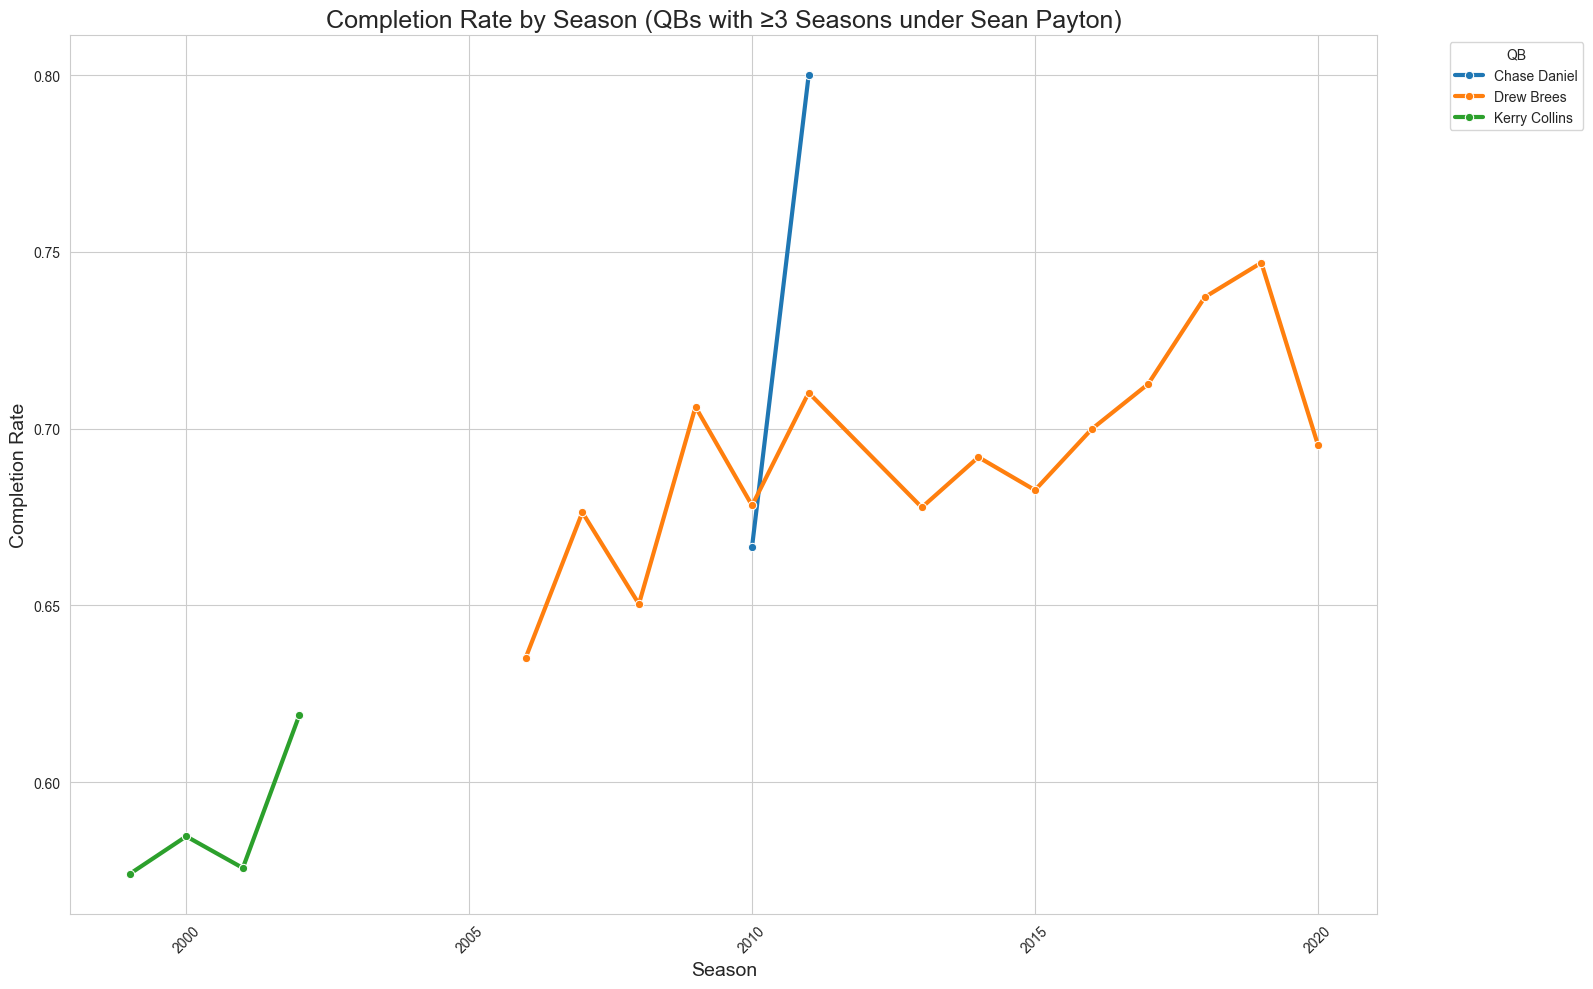

F-statistic: nan, p-value: nan


/var/folders/2b/g2gths1d7m3b6d4srzqc5zxm0000gn/T/ipykernel_61389/2379953772.py:44: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(*groups)


In [ ]:
"""
Seasons per qb
"""
player_counts = qb_df["player_display_name"].value_counts()

"""
Only players with 3 seasons. TMay shorten to 2 seasons. 
"""
qb_filtered = qb_df[
    qb_df["player_display_name"].isin(
        player_counts[player_counts >= 3].index
    )
]


plt.figure(figsize=(16,10))
sns.set_style("whitegrid")

sns.lineplot(
    data=qb_filtered,
    x="season",
    y="completion_rate",
    hue="player_display_name",
    palette="tab10",
    marker="o",
    linewidth=3
)

plt.title("Completion Rate by Season (QBs with ≥3 Seasons under Sean Payton)", fontsize=18)
plt.ylabel("Completion Rate", fontsize=14)
plt.xlabel("Season", fontsize=14)
plt.xticks(rotation=45)

# legend outside plot
plt.legend(title="QB", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



"""
Anova
"""
groups = [
    group["completion_rate"].dropna().values
    for _, group in qb_df.groupby("player_display_name")
]

anova_result = f_oneway(*groups)
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.6f}")

